In [1]:
# Import libraries
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customers = pd.read_csv("olist_customers_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
order_payments = pd.read_csv("olist_order_payments_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
product = pd.read_csv("olist_products_dataset.csv")
seller = pd.read_csv("olist_sellers_dataset.csv")
translate = pd.read_csv("product_category_name_translation.csv")


In [3]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [4]:

df1 = order_items.merge(order_payments, on='order_id')
df2 = df1.merge(orders, on='order_id')
the_df = df2.merge(customers, on='customer_id')

print(the_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 22 columns):
order_id                         117601 non-null object
order_item_id                    117601 non-null int64
product_id                       117601 non-null object
seller_id                        117601 non-null object
shipping_limit_date              117601 non-null object
price                            117601 non-null float64
freight_value                    117601 non-null float64
payment_sequential               117601 non-null int64
payment_type                     117601 non-null object
payment_installments             117601 non-null int64
payment_value                    117601 non-null float64
customer_id                      117601 non-null object
order_status                     117601 non-null object
order_purchase_timestamp         117601 non-null object
order_approved_at                117586 non-null object
order_delivered_carrier_date     116356 non-null 

In [5]:
pay_method=the_df.groupby(['customer_unique_id'])['payment_type'].sum().reset_index()

In [6]:
pay_method.head(20)

,customer_unique_id,payment_type
0,0000366f3b9a7992bf8c76cfdf3221e2,credit_card
1,0000b849f77a49e4a4ce2b2a4ca5be3f,credit_card
2,0000f46a3911fa3c0805444483337064,credit_card
3,0000f6ccb0745a6a4b88665a16c9f078,credit_card
4,0004aac84e0df4da2b147fca70cf8255,credit_card
5,0004bd2a26a76fe21f786e4fbd80607f,credit_card
6,00050ab1314c0e55a6ca13cf7181fecf,boleto
7,00053a61a98854899e70ed204dd4bafe,credit_cardcredit_card
8,0005e1862207bf6ccc02e4228effd9a0,credit_card
9,0005ef4cd20d2893f0d9fbd94d3c0d97,credit_card


In [7]:
method_count = the_df['payment_type'].value_counts().to_frame().reset_index()
method_count.head(10)

,index,payment_type
0,credit_card,86769
1,boleto,22867
2,voucher,6274
3,debit_card,1691


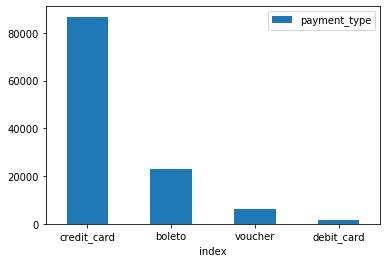

In [8]:
viz = method_count.plot.bar(x='index', y='payment_type', rot=0)

In [9]:
translate.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
top_prod= translate['product_category_name_english'].value_counts().to_frame().reset_index()

In [11]:
top_prod

,index,product_category_name_english
0,cool_stuff,1
1,fixed_telephony,1
2,la_cuisine,1
3,construction_tools_lights,1
4,market_place,1
5,small_appliances_home_oven_and_coffee,1
6,baby,1
7,health_beauty,1
8,home_construction,1
9,consoles_games,1


In [16]:
zip_df = the_df['customer_zip_code_prefix'].value_counts().to_frame().reset_index()

In [17]:
zip_df.head()

,index,customer_zip_code_prefix
0,24220,158
1,22790,155
2,22793,154
3,24230,138
4,22775,127
